<a href="https://colab.research.google.com/github/HongEnJung/EDA-Prediction/blob/main/%EA%B3%A0%EA%B0%9D_%EC%98%88%EA%B8%88_%EA%B0%80%EC%9E%85_%EC%97%AC%EB%B6%80_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 고객 예금 가입 여부 예측



```
• 과제 목표: Scikit-learn exercise 1,2,3에 소개된 머신러닝 과정 및 scikit-learn 라이브러리들을
최대한 활용하여 주어진 데이터셋으로 서로다른 머신러닝 알고리즘 최소 2개 이상 훈련시키고
성능을 비교하라

```


```
• 다음 요소를 포함할 것
  • 데이터 시각화 및 기술통계량 요약등을 통해 개략적으로 데이터 생김새를 파악할것
  • 적절한 데이터 전처리 (정규화, 인코딩 등등)
  • 적절한 머신러닝 알고리즘 선택 및 교차검증 수행
  • 다양한 성능검증 measure 사용
  • ROC를 활용한 성능 시각화
  • 그 외 필요하다고 생각되는 분석 요소들을 자유롭게 추가할 것
  • Text 셀 및 주석을 이용하여 최대한 자세하게 코드를 설명할 것
```




### 데이터 불러오기 및 정보 파악

In [304]:
# 구글 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
import pandas as pd

# 데이터 불러오기
bank=pd.read_csv('/content/drive/MyDrive/학교/머신러닝/과제, scikit_learn 1,2,3/bank.csv', delimiter=';')

# 데이터 조회
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [306]:
# 데이터 정보
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [307]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [308]:
# 기술통계량 요약 
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [309]:
# Object 기술통계 요약
bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [310]:
# y 값 변환 (가입: 1, 미가입: 0) 
bank['y'].replace({'no':0, 'yes':1}, inplace=True)

### 데이터 시각화

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns   #for visualization
%matplotlib inline

              job         y
5         retired  0.234783
8         student  0.226190
11        unknown  0.184211
4      management  0.135191
3       housemaid  0.125000
0          admin.  0.121339
6   self-employed  0.109290
9      technician  0.108073
10     unemployed  0.101562
7        services  0.091127
2    entrepreneur  0.089286
1     blue-collar  0.072939


<Axes: xlabel='job', ylabel='y'>

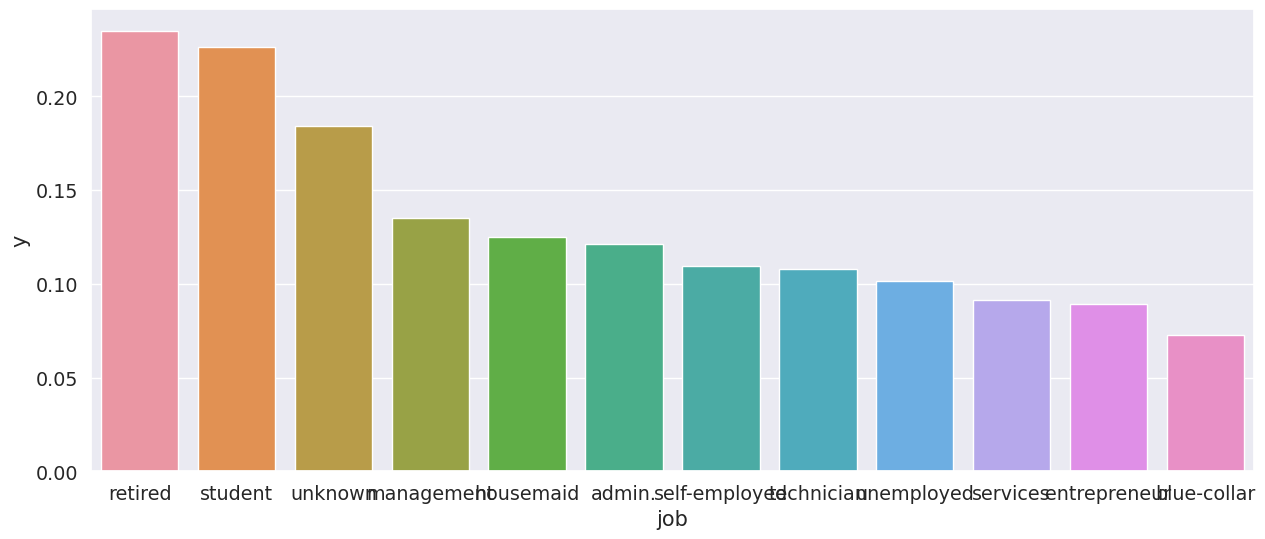

In [312]:
# 데이터 시각화

# 직업에 따른 예금 가입률
job_group=bank[['job','y']].groupby(['job'], as_index=False).mean().sort_values(
    by='y', ascending=False)
print(job_group)
plt.figure(figsize=(15, 6))
sns.barplot(x='job', y = 'y', data=job_group)

    marital         y
0  divorced  0.145833
2    single  0.139632
1   married  0.099035


<Axes: xlabel='marital', ylabel='y'>

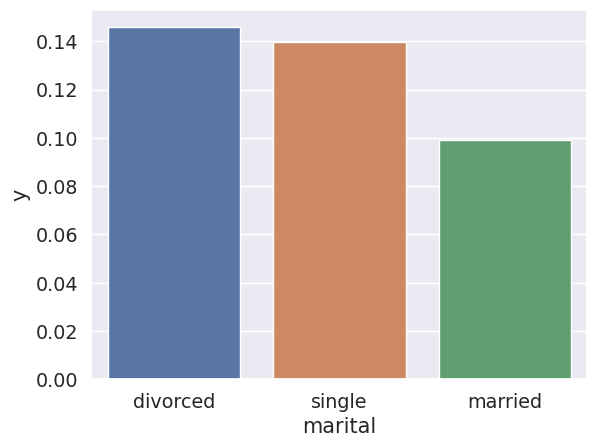

In [313]:
# 결혼 여부에 따른 예금 가입률
marital_group= bank[['marital','y']].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=False)
print(marital_group)
sns.barplot(x='marital', y='y', data=marital_group)

   education         y
2   tertiary  0.142963
1  secondary  0.106245
3    unknown  0.101604
0    primary  0.094395


<Axes: xlabel='education', ylabel='y'>

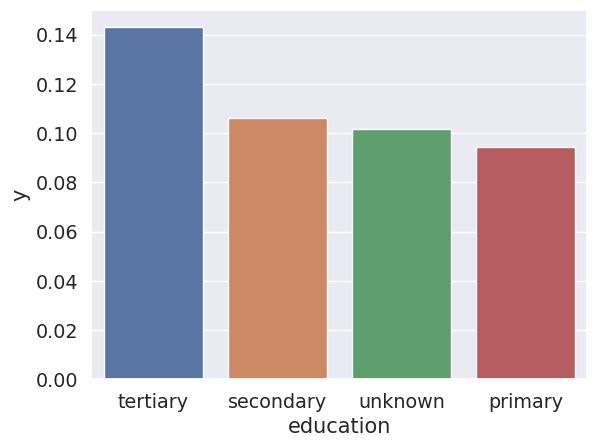

In [314]:
# 교육수준에 따른 예금 가입률
education_group=bank[['education','y']].groupby(['education'], as_index=False).mean().sort_values(by='y',ascending=False)
print(education_group)
sns.barplot(x='education', y='y', data=education_group)

  housing         y
0      no  0.153415
1     yes  0.085971


<Axes: xlabel='housing', ylabel='y'>

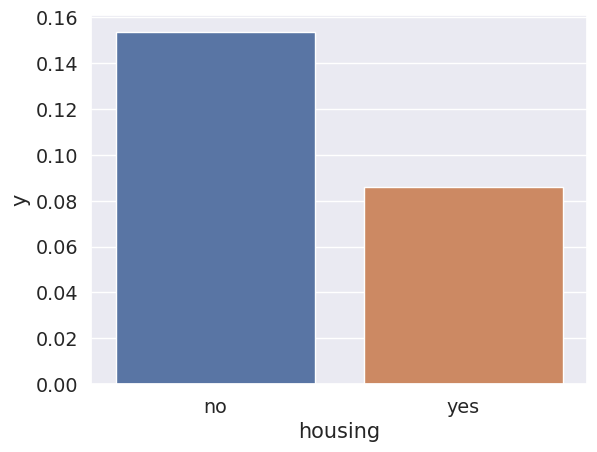

In [315]:
# 주택대출 여부에 따른 예금 가입률
housing_group= bank[['housing','y']].groupby(['housing'], as_index=False).mean().sort_values(by='y', ascending=False)
print(housing_group)
sns.barplot(x='housing', y='y', data=housing_group)

  loan         y
0   no  0.124804
1  yes  0.062229


<Axes: xlabel='loan', ylabel='y'>

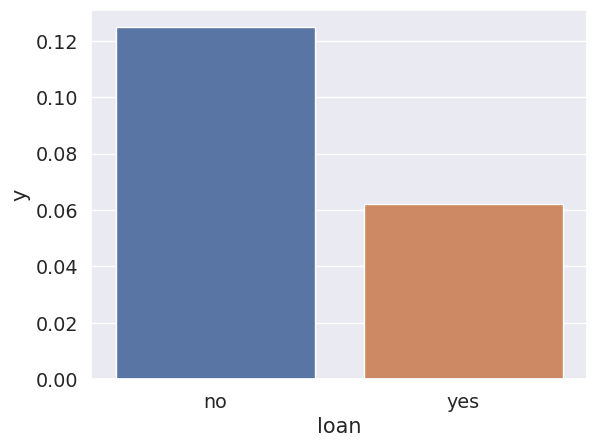

In [316]:
# 개인대출에 따른 예금 가입률
loan_group= bank[['loan','y']].groupby(['loan'], as_index=False).mean().sort_values(by='y', ascending=False)
print(loan_group)
sns.barplot(x='loan', y='y', data=loan_group)

     contact         y
1  telephone  0.146179
0   cellular  0.143646
2    unknown  0.046073


<Axes: xlabel='contact', ylabel='y'>

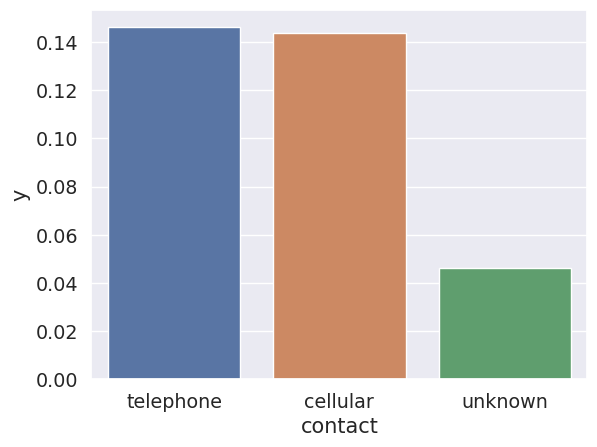

In [317]:
# 연락수단에 따른 예금 가입률
contact_group=bank[['contact','y']].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)
print(contact_group)
sns.barplot(x='contact', y='y', data=contact_group)

   month         y
10   oct  0.462500
2    dec  0.450000
7    mar  0.428571
11   sep  0.326923
0    apr  0.191126
3    feb  0.171171
1    aug  0.124803
4    jan  0.108108
6    jun  0.103578
9    nov  0.100257
5    jul  0.086402
8    may  0.066524


<Axes: xlabel='month', ylabel='y'>

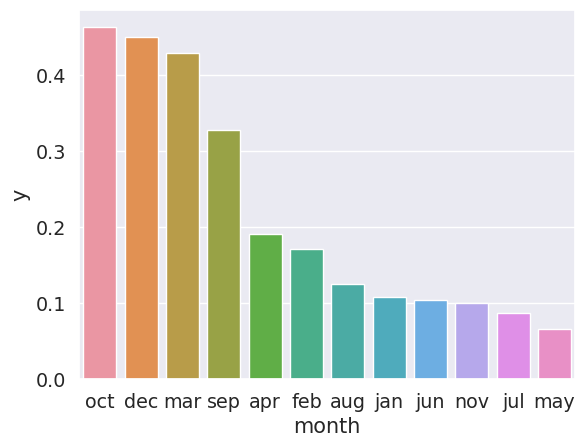

In [318]:
# 월에 따른 예금 가입률
month_group=bank[['month','y']].groupby(['month'], as_index=False).mean().sort_values(by='y', ascending=False)
print(month_group)
sns.barplot(x='month', y='y', data=month_group)

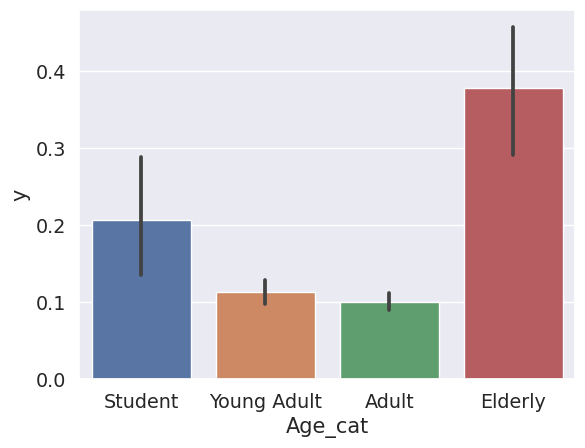

In [319]:
# get_category(age)에 따른 예금 가입률
# 입력 age에 따른 구분값을 반환하는 함수
def get_category(age):
  cat=''
  if age <=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age <=60: cat='Adult'
  else: cat='Elderly'

  return cat

# X푹의 값을 순차적으로 표시하기 위한 설정
group_names=['Student','Young Adult','Adult','Elderly']

bank['Age_cat']=bank['age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='y', data=bank, order=group_names)
bank.drop('Age_cat', axis=1, inplace=True)

<ipython-input-320-dd914ddecadb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = bank.corr()


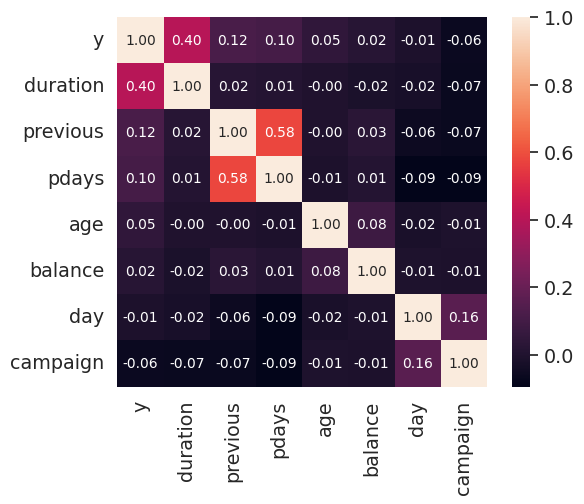

In [320]:
import numpy as np

# 데이터 전처리 전 상관관계
# correlation matrix (heatmap)
corrmat = bank.corr()
k=8
cols=corrmat.nlargest(k, 'y')['y'].index # y와 상관계수가 높은 8개 변수 
cm = np.corrcoef(bank[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt ='.2f',
                 annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 데이터 전처리

In [321]:
# 데이터 전처리(정규화, 인코딩 등)

# 인코딩
# object 값 조회
bank.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,969,2797,2306,4445,2559,3830,2896,1398,3705


In [322]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['job','marital','education','default','housing','loan','contact','month','poutcome']
  for i in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[i])
    dataDF[i] = le.transform(dataDF[i])
  
  return dataDF

bank=encode_features(bank)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <BarContainer object of 10 artists>)

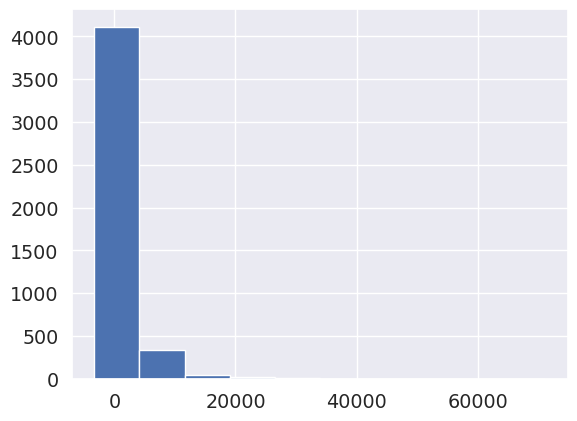

In [323]:
# 표준편차가 큰 balance, duration, pdays 정규화 진행

# 히스토그램을 통한 데이터 빈도 및 정규성 확인
plt.hist(bank['balance'], bins=10)

(array([3.285e+03, 8.250e+02, 2.670e+02, 9.100e+01, 2.900e+01, 1.600e+01,
        5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([   4. ,  306.1,  608.2,  910.3, 1212.4, 1514.5, 1816.6, 2118.7,
        2420.8, 2722.9, 3025. ]),
 <BarContainer object of 10 artists>)

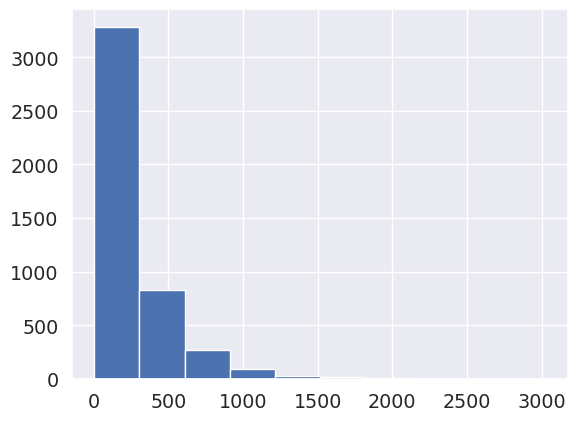

In [324]:
plt.hist(bank['duration'], bins=10)

(array([3.759e+03, 2.480e+02, 2.000e+02, 1.700e+02, 1.230e+02, 1.300e+01,
        1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

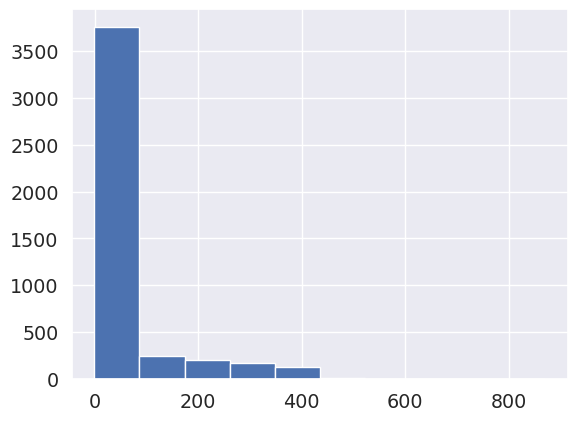

In [325]:
plt.hist(bank['pdays'], bins=10)

In [326]:
# 데이터에 0이 포함되어 있으므로 StandardScaler 진행

from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler=StandardScaler()
# StandardScaler로 데이터 변환, fit()과 transform() 호출
selected_columns = ['balance', 'duration', 'pdays']
bank_scaled = scaler.fit_transform(bank[selected_columns])

# 정규화된 데이터를 기존 데이터프레임에 반영
bank[selected_columns] = bank_scaled

# 정규화된 데이터 출력
print(bank[selected_columns])
print(bank[selected_columns].mean())
print(bank[selected_columns].var())

       balance  duration     pdays
0     0.121072 -0.711861 -0.407218
1     1.118644 -0.169194  2.989044
2    -0.024144 -0.303898  2.899143
3     0.017726 -0.250017 -0.407218
4    -0.472753 -0.146102 -0.407218
...        ...       ...       ...
4516 -0.583410  0.250315 -0.407218
4517 -1.573671 -0.427057 -0.407218
4518 -0.374724 -0.434754 -0.407218
4519 -0.094925 -0.519426  1.710451
4520 -0.095257  0.311894  2.090033

[4521 rows x 3 columns]
balance    -1.571649e-17
duration   -7.622500e-17
pdays      -3.889832e-17
dtype: float64
balance     1.000221
duration    1.000221
pdays       1.000221
dtype: float64


In [327]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,0.121072,0,0,0,19,10,-0.711861,1,-0.407218,0,3,0
1,33,7,1,1,0,1.118644,1,1,0,11,8,-0.169194,1,2.989044,4,0,0
2,35,4,2,2,0,-0.024144,1,0,0,16,0,-0.303898,1,2.899143,1,0,0
3,30,4,1,2,0,0.017726,1,1,2,3,6,-0.250017,4,-0.407218,0,3,0
4,59,1,1,1,0,-0.472753,1,0,2,5,8,-0.146102,1,-0.407218,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-0.583410,1,0,0,30,5,0.250315,5,-0.407218,0,3,0
4517,57,6,1,2,1,-1.573671,1,1,2,9,8,-0.427057,1,-0.407218,0,3,0
4518,57,9,1,1,0,-0.374724,0,0,0,19,1,-0.434754,11,-0.407218,0,3,0
4519,28,1,1,1,0,-0.094925,0,0,0,6,3,-0.519426,4,1.710451,3,1,0


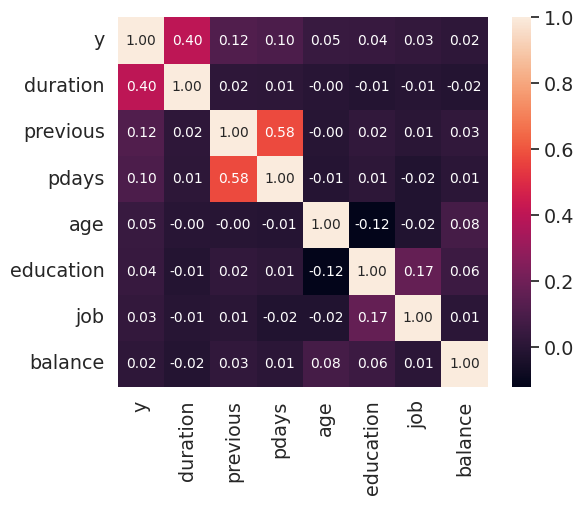

In [328]:
# 전처리 후 상관관계
# correlation matrix (heatmap)
corrmat = bank.corr()
k=8
cols=corrmat.nlargest(k, 'y')['y'].index # y와 상관계수가 높은 8개 변수 
cm = np.corrcoef(bank[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt ='.2f',
                 annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 머신러닝 알고리즘

In [329]:
# feature 데이터 셋과 Label 데이터 셋 추출
y_bank=bank['y']
x_bank=bank.drop('y', axis=1)

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_bank, y_bank, test_size=0.3, random_state=11)

In [331]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킨럿 Classifier 클래스 생성 
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter =1000)

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.8570
RandomForestClassifier 정확도:0.8968
LogisticRegression 정확도:0.9013


### 교차검증

In [332]:
from sklearn.model_selection import cross_val_score

def cross_val(x):
  scores = cross_val_score(x, x_bank, y_bank, cv=5)
  for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도:{1:.4f}'.format(iter_count, accuracy))
  print('평균정확도: {0:.4f}'.format(np.mean(scores)))
  return x

In [333]:
cross_val(dt_clf)

교차검증 0 정확도:0.8785
교차검증 1 정확도:0.8529
교차검증 2 정확도:0.8695
교차검증 3 정확도:0.8695
교차검증 4 정확도:0.8562
평균정확도: 0.8653


DecisionTreeClassifier(random_state=11)

In [334]:
cross_val(rf_clf)

교차검증 0 정확도:0.8994
교차검증 1 정확도:0.8960
교차검증 2 정확도:0.8916
교차검증 3 정확도:0.8938
교차검증 4 정확도:0.9038
평균정확도: 0.8969


RandomForestClassifier(random_state=11)

In [335]:
cross_val(lr_clf)

교차검증 0 정확도:0.8840
교차검증 1 정확도:0.8883
교차검증 2 정확도:0.8883
교차검증 3 정확도:0.8927
교차검증 4 정확도:0.8905
평균정확도: 0.8887


LogisticRegression(max_iter=1000)

### 다양한 성능검증의 measure

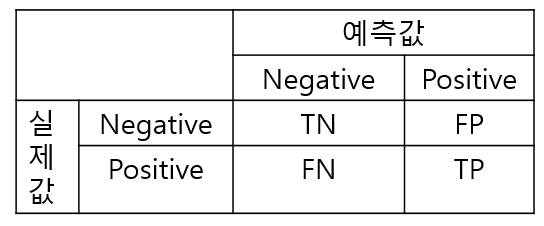

1. 정밀도(Precision)는 양성으로 예측된 샘플 중에서 실제로 양성인 비율
2. 재현율(Recall)은 실제로 양성인 샘플 중에서 양성으로 정확하게 예측된 비율

In [336]:
# 오차행렬, 정확도, 정밀도, 재현율, F1, AUC를 한꺼번에 계산하는 함수 생성
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(
      accuracy, precision, recall, f1, roc_auc))

In [337]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  # x축을 threshold 값으로, y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
  
  # threshold 값 x 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend 그리고 grid 설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

In [338]:
# 결정트리
print('DecisionTreeClassifier')
get_clf_eval(y_test , dt_pred, dt_pred_proba)
print()
# 랜덤포레스트
print('RandomForestClassifier')
get_clf_eval(y_test , rf_pred, rf_pred_proba)
print()
# 로지스틱 회귀
print('LogisticRegression')
get_clf_eval(y_test , lr_pred, lr_pred_proba)

DecisionTreeClassifier
오차행렬
[[1099  117]
 [  77   64]]
정확도: 0.8570, 정밀도: 0.3536, 재현율: 0.4539, F1: 0.3975, AUC:0.6788

RandomForestClassifier
오차행렬
[[1178   38]
 [ 102   39]]
정확도: 0.8968, 정밀도: 0.5065, 재현율: 0.2766, F1: 0.3578, AUC:0.8943

LogisticRegression
오차행렬
[[1187   29]
 [ 105   36]]
정확도: 0.9013, 정밀도: 0.5538, 재현율: 0.2553, F1: 0.3495, AUC:0.8613


DecisionTreeClassifier


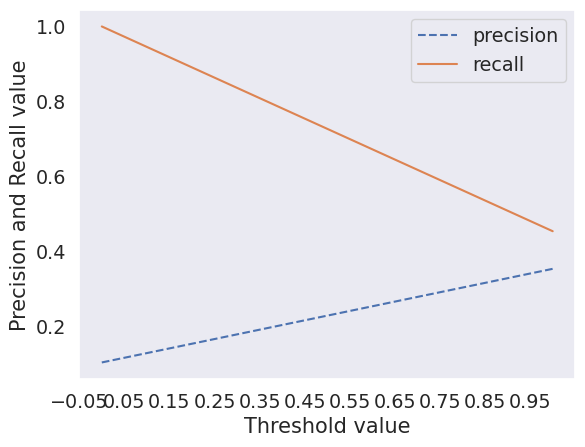


RandomForestClassifier


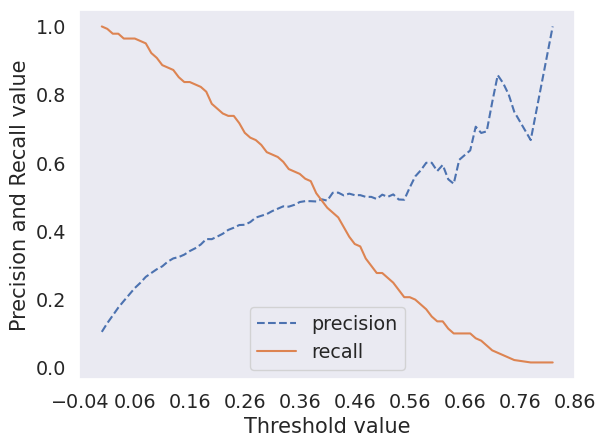


LogisticRegression


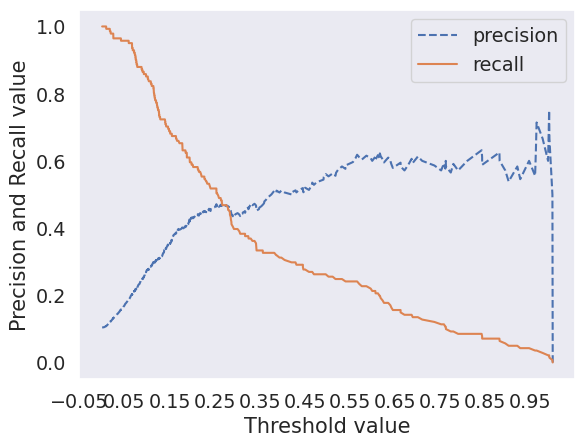

In [339]:
# precision, recall 시각화(임계값)
print('DecisionTreeClassifier')
dt_pred_proba_c1 = dt_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, dt_pred_proba_c1)

print('\nRandomForestClassifier')
rf_pred_proba_c1 = rf_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, rf_pred_proba_c1)

print('\nLogisticRegression')
lr_pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, lr_pred_proba_c1)

In [340]:
# ROC 성능 시각화

def roc_curve_plot(y_test, pred_proba_c1):
  # 임계값에 따른 FPR, TPR 값을 반환 받음
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  # ROC curve를 plot 곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  # 가운데 대각선 직선을 그림
  plt.plot([0,1], [0,1], 'k--', label='Random')

  # FPR X축의 Scale을 0.1단위로 변경, X,Y축명 설정
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

DecisionTreeClassifier


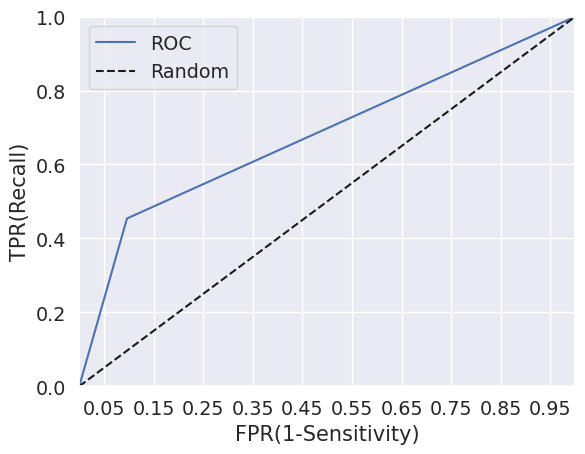

0.6788

RandomForestClassifier


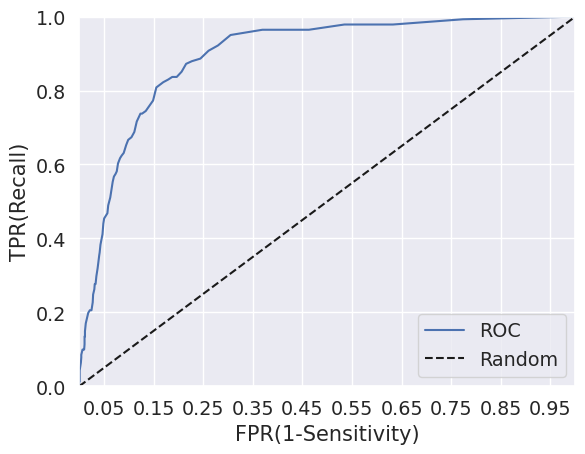

0.8943

LogisticRegression


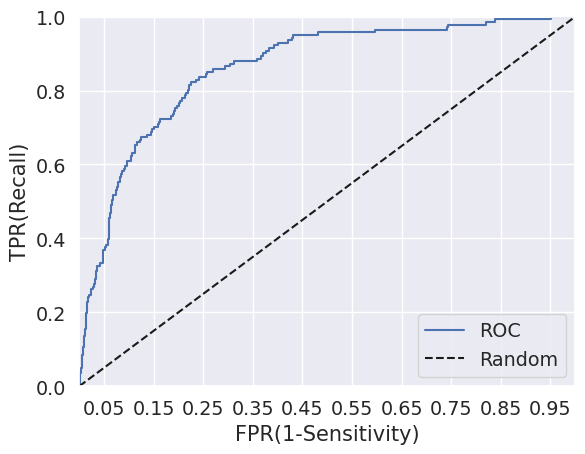

0.8613


In [341]:
print('DecisionTreeClassifier')
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:, 1] )
print(round(roc_auc_score(y_test, dt_pred_proba),4))

print('\nRandomForestClassifier')
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:, 1] )
print(round(roc_auc_score(y_test, rf_pred_proba),4))

print('\nLogisticRegression')
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )
print(round(roc_auc_score(y_test, lr_pred_proba),4))


# 머신러닝 알고리즘 성능 비교
---
1. confusion matrix

  ▶ 정확도

  - 로지스틱 회귀 > 랜덤포레스트 > 결정트리

  ▶ 정밀도

  - 로지스틱 회귀 > 랜덤포레스트 > 결정트리

  ▶ 재현율

  - 결정트리 > 랜던포레스트 > 로지스틱 회귀

  ▶ F1

  - 결정트리 > 랜던포레스트 > 로지스틱 회귀

  ▶ ROC-AUC 

  - 랜덤포레스트 > 로지스틱 회귀 > 결정트리

2. 교차검증 정확도

  - 랜덤포레스트 > 로지스틱 회귀 > 결정트리

---